# Obama & Trump Tweets - Part 3

- In this notebook, I will perform analysis and visualize the results
- Display the most used words using **Counter** and also visualize the results using **worldCloud**

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import string

import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

from wordcloud import WordCloud
from PIL import Image # To mask the wordcloud, I have to import PIL - Pillow library

# Set Default Settings

In [2]:
sns.set_style('darkgrid')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)

nlp = spacy.load('en_core_web_sm')

In [7]:
df = pd.read_pickle('Trump_Obama_Tweets_Detailed_final.pickle')
df[:2]

,id,user,date,favorite_counts,retweet_counts,tweets,hashtags,mentions,tweets_length,tweets_spaces,tweets_uppercase,tweets_punctuations,tweets_questionmark,tweets_exclamation_mark,polarity,subjectivity,polarity_status,subjectivity_status,is_neutral,is_positive,is_negative,part_of_day,is_early,is_morning,is_noon,is_evening,is_midnight,is_norp,is_time,is_org,is_gpe,is_loc,is_product,is_workart,is_fac,is_noun,is_pron,is_adv,is_propn,is_verb,is_intj
0,1076308614372048897,Donald Trump,2018-12-22 02:49:05,61773,17110,OUR GREAT COUNTRY MUST HAVE BORDER SECURITY!,NaN,NaN,45,7,37,1,0,1,1.00,0.75,Very Positive,Very Subjective,0,1,0,Mid Night,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,3,2,0
1,1076270321861312512,Donald Trump,2018-12-22 00:16:55,66758,10652,Wishing Supreme Court Justice Ruth Bader Ginsburg a full and speedy recovery!,NaN,NaN,77,11,7,1,0,1,0.44,0.55,Positive,Subjective,0,1,0,Mid Night,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,6,1,0


# Import Pickled File

In [5]:
#pd.DataFrame(df.dtypes).transpose()
df.dtypes

id                           int64
user                        object
date                        object
favorite_counts              int64
retweet_counts               int64
tweets                      object
hashtags                    object
mentions                    object
tweets_length                int64
tweets_spaces                int64
tweets_uppercase             int64
tweets_punctuations          int64
tweets_questionmark          int64
tweets_exclamation_mark      int64
polarity                   float64
subjectivity               float64
polarity_status             object
subjectivity_status         object
is_neutral                   int64
is_positive                  int64
is_negative                  int64
part_of_day                 object
is_early                     int64
is_morning                   int64
is_noon                      int64
is_evening                   int64
is_midnight                  int64
is_norp                      int64
is_time             

In [8]:
# Convert date to datetime type
df.date = pd.to_datetime(df.date)

# Extract Information
1. Extract Additional information from the date column

In [9]:
# Extract months, week days, days 
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['week_day'] = df.date.dt.weekday # Weekday as number
df['week_day_name'] = df.date.dt.weekday_name # Weekday as text
df['hour'] = df.date.dt.hour

In [10]:
df.head(2)

,id,user,date,favorite_counts,retweet_counts,tweets,hashtags,mentions,tweets_length,tweets_spaces,tweets_uppercase,tweets_punctuations,tweets_questionmark,tweets_exclamation_mark,polarity,subjectivity,polarity_status,subjectivity_status,is_neutral,is_positive,is_negative,part_of_day,is_early,is_morning,is_noon,is_evening,is_midnight,is_norp,is_time,is_org,is_gpe,is_loc,is_product,is_workart,is_fac,is_noun,is_pron,is_adv,is_propn,is_verb,is_intj,month,day,week_day,week_day_name,hour
0,1076308614372048897,Donald Trump,2018-12-22 02:49:05,61773,17110,OUR GREAT COUNTRY MUST HAVE BORDER SECURITY!,NaN,NaN,45,7,37,1,0,1,1.00,0.75,Very Positive,Very Subjective,0,1,0,Mid Night,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,3,2,0,12,22,5,Saturday,2
1,1076270321861312512,Donald Trump,2018-12-22 00:16:55,66758,10652,Wishing Supreme Court Justice Ruth Bader Ginsburg a full and speedy recovery!,NaN,NaN,77,11,7,1,0,1,0.44,0.55,Positive,Subjective,0,1,0,Mid Night,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,6,1,0,12,22,5,Saturday,0


In [12]:
df.loc[(df.user == 'Donald Trump') & (df.polarity_status == 'Negative')]

,id,user,date,favorite_counts,retweet_counts,tweets,hashtags,mentions,tweets_length,tweets_spaces,tweets_uppercase,tweets_punctuations,tweets_questionmark,tweets_exclamation_mark,polarity,subjectivity,polarity_status,subjectivity_status,is_neutral,is_positive,is_negative,part_of_day,is_early,is_morning,is_noon,is_evening,is_midnight,is_norp,is_time,is_org,is_gpe,is_loc,is_product,is_workart,is_fac,is_noun,is_pron,is_adv,is_propn,is_verb,is_intj,month,day,week_day,week_day_name,hour
9,1076125633275666433,Donald Trump,2018-12-21 14:41:59,62953,14642,"There has never been a president who has been tougher (but fair) on China or Russia - Never, just look at the facts. The Fake News tries so hard t...",NaN,NaN,175,33,7,6,0,0,-0.04,0.57,Negative,Subjective,0,0,1,Early Morning,1,0,0,0,0,0,0,1,2,0,0,0,0,3,1,4,5,7,0,12,21,4,Friday,14
12,1076094498210500608,Donald Trump,2018-12-21 12:38:15,79311,18197,"Even President Ronald Reagan tried for 8 years to build a Border Wall, or Fence, and was unable to do so. Others also have tried. We will get it d...",NaN,NaN,172,34,9,6,0,1,-0.33,0.44,Negative,Subjective,0,0,1,Early Morning,1,0,0,0,0,0,0,1,0,0,0,0,0,3,2,3,6,9,0,12,21,4,Friday,12
15,1076090986651099136,Donald Trump,2018-12-21 12:24:18,68853,17344,"The Democrats, whose votes we need in the Senate, will probably vote against Border Security and the Wall even though they know it is DESPERATELY ...",NaN,NaN,278,50,29,6,0,1,-0.17,0.52,Negative,Subjective,0,0,1,Early Morning,1,0,0,0,0,2,0,3,0,0,0,0,0,5,3,5,10,12,1,12,21,4,Friday,12
26,1075833793720795141,Donald Trump,2018-12-20 19:22:19,112095,24472,"So hard to believe that Lindsey Graham would be against saving soldier lives &amp; billions of $$$. Why are we fighting for our enemy, Syria, by s...",NaN,NaN,294,51,13,18,1,1,-0.14,0.31,Negative,Objective,0,0,1,Early Morning,1,0,0,0,0,0,0,3,2,0,0,0,0,11,3,5,7,11,0,12,20,3,Thursday,19
31,1075726666574544896,Donald Trump,2018-12-20 12:16:38,71388,16562,"....Russia, Iran, Syria &amp; many others are not happy about the U.S. leaving, despite what the Fake News says, because now they will have to fig...",NaN,NaN,284,51,16,17,0,1,-0.05,0.75,Negative,Very Subjective,0,0,1,Early Morning,1,0,0,0,0,0,0,4,3,0,0,0,0,7,8,4,7,11,0,12,20,3,Thursday,12
39,1075404434862235649,Donald Trump,2018-12-19 14:56:11,78899,20482,"...sleazebag AG Eric Schneiderman, who has since resigned over horrific women abuse, when I wanted to close the Foundation so as not to be in conf...",NaN,NaN,278,46,13,13,0,0,-0.40,0.77,Negative,Very Subjective,0,0,1,Early Morning,1,0,0,0,0,1,0,2,0,0,0,0,0,6,2,3,11,8,0,12,19,2,Wednesday,14
51,1075018465356996609,Donald Trump,2018-12-18 13:22:29,74883,19363,"....WILL NEVER BE PROVEN AND ARE LIKELY FALSE.” Thank you to Michael Isikoff, Yahoo, for honesty. What this means is that the FISA WARRANTS and t...",NaN,NaN,282,51,62,13,0,1,-0.04,0.42,Negative,Subjective,0,0,1,Early Morning,1,0,0,0,0,1,0,4,0,0,0,0,0,3,3,3,13,12,0,12,18,1,Tuesday,13
57,1074989817061093378,Donald Trump,2018-12-18 11:28:39,75266,20147,"Biggest outrage yet in the long, winding and highly conflicted Mueller Witch Hunt is the fact that 19,000 demanded Text messages between Peter Str...",NaN,NaN,280,44,14,9,0,1,-0.04,0.46,Negative,Subjective,0,0,1,Early Morning,1,0,0,0,0,0,0,1,0,0,0,0,0,6,0,5,10,10,0,12,18,1,Tuesday,11
62,1074407956500889600,Donald Trump,2018-12-16 20:56:33,106991,29134,"....The Russian Witch Hunt Hoax, started as the “insurance policy” long before I even got elected, is very bad for our Country. They are Entrappin...",NaN,NaN,277,45,14,11,0,1,-0.08,0.44,Negative,Subjective,0,0,1,Early Morning,1,0,0,0,0,2,0,1,1,0,0,0,0,10,2,4,7,8,0,12,16,6,Sunday,20
69,1074313153679450113,Donald Trump,2018-12-16 14:39:50,125977,32090,"Remember, Michael Cohen only became a “Rat” after the FBI did something which was absolutely unthinkable &amp; unheard of until the Witch Hunt was...",NaN,NaN,278,45,42,7,1,1,-0.17,0.60,Negative,Subjective,0,0,1,Early Morning,1,0,0,0,0,0,0,4,0,1,0,0,0,

# EDA Analysis 

    1. Tweets over the time ( weekdays / days / hours). Dataset contains tweets from December 2018
    

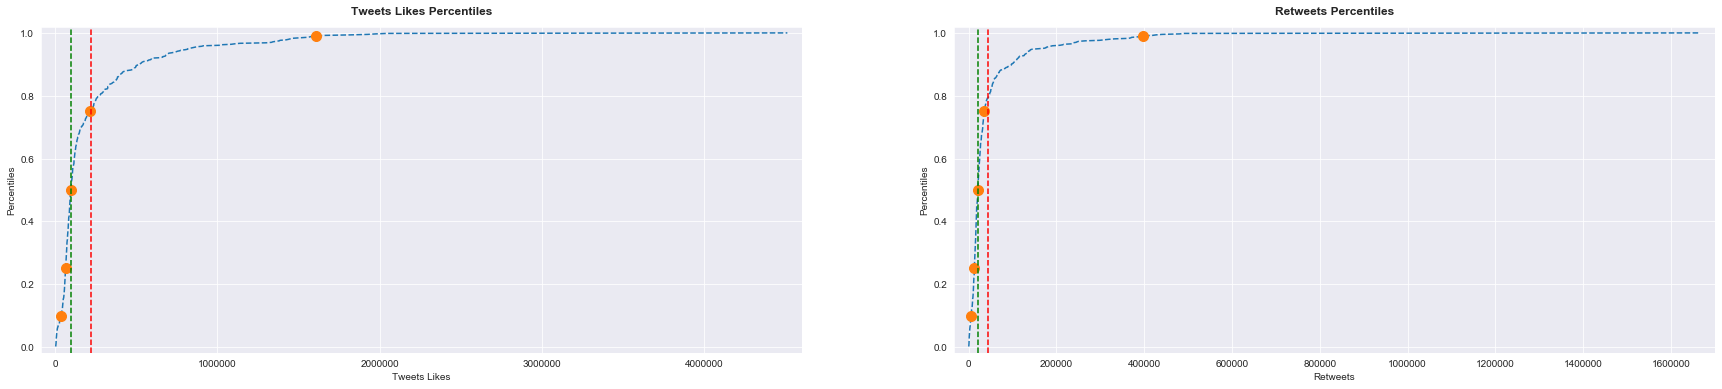

In [13]:
# ECDF Plotting with Percentiles

def eda_plot(data, cols, title, xlabel, ylabel):

    fig, ax = plt.subplots(ncols = 2, figsize= (30,6))
    
    for indx, col in enumerate(cols):

        # Preparing mean and median for both likes and retweets counts
        mean   = data[col].mean()
        median = data[col].median()

        # Tweets Likes
        percentiles      = np.array([10, 25, 50, 75, 99])
        percentiles_vars = np.percentile(data[col], percentiles)

        # Preparing points for number of likes and retweets
        x = np.sort(data[col].values)
        y = np.arange(1, len(data[col]) + 1) / len(data[col])

        # Preparing plots
        ax[indx].plot(x, y, '--')
        ax[indx].plot(percentiles_vars, percentiles / 100, marker = 'o', markersize = 10, linestyle = 'none')

        ax[indx].set_xlabel(xlabel[indx])
        ax[indx].set_ylabel(ylabel[indx])
        ax[indx].set_title(title[indx], pad = 12, weight = 'bold')

        # Display mean and median
        ax[indx].axvline(mean, color='r', linestyle='--')
        ax[indx].axvline(median, color='g', linestyle='--')

        ax[indx].margins(0.02)

    plt.show()

# Call function to plot EDA
eda_plot(data = df, 
         cols = ['favorite_counts', 'retweet_counts'],
         title = ['Tweets Likes Percentiles', 'Retweets Percentiles'], 
         xlabel = ['Tweets Likes', 'Retweets'], 
         ylabel = ['Percentiles', 'Percentiles'])

# Obama VS Trumps

### General Insights 

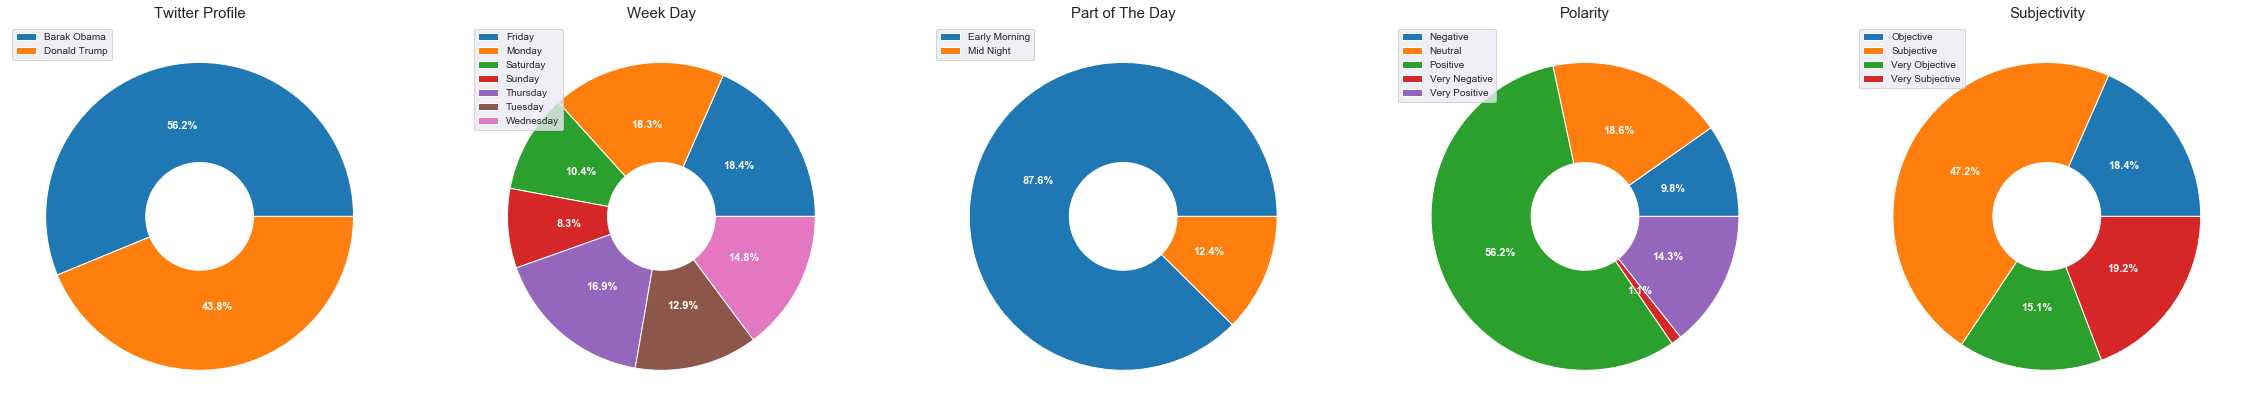

In [14]:
# Create Dictionaries
round1_cols      = ['user', 'week_day_name', 'part_of_day', 'polarity_status', 'subjectivity_status']
round1_titles    = ['Twitter Profile', 'Week Day', 'Part of The Day', 'Polarity', 'Subjectivity']
round1_cols_dict = dict(zip(range(0, len(round1_cols)), round1_cols))

# Create Pie Plot
fig, ax = plt.subplots(ncols = 5, figsize= (40,8))

for indx, col in round1_cols_dict.items():
    
    legend_list = df[col].value_counts(normalize = True).sort_index(ascending=True).keys().tolist()
    x = df[col].value_counts(normalize = True).sort_index(ascending=True)
    
    ax[indx].pie(data = df, x = x, autopct='%1.1f%%', textprops = {'fontsize': 11, 'color': 'w', 'weight': 'bold'})
    ax[indx].add_patch(plt.Circle((0,0), 0.35, fc = 'white'))
    
    ax[indx].legend(legend_list, loc = 2)
    ax[indx].set_title(round1_titles[indx], size = 15)

plt.show()

In [16]:
grouped = df.groupby([df.week_day_name, df.user]).size().reset_index().rename(columns = {0: 'counts'})

In [17]:
grouped.week_day_name.unique()

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [18]:
grouped

,week_day_name,user,counts
0,Friday,Barak Obama,52
1,Friday,Donald Trump,65
2,Monday,Barak Obama,69
3,Monday,Donald Trump,47
4,Saturday,Barak Obama,26
5,Saturday,Donald Trump,40
6,Sunday,Barak Obama,34
7,Sunday,Donald Trump,19
8,Thursday,Barak Obama,65
9,Thursday,Donald Trump,42


In [20]:
# Annotation function
def annotate_perct(ax_plot, total, add_height, rot):
    '''
    Definition - 
    
    Parameters - 
        1. ax_plot: is the graph object
        2. total: is the length of the dataframe or the sum of specific column, the use of this parameter depends on the objective of the graph
        3. add_height: the additional hight added to the actual hight in order to display the annotation on top of the bar. 
        4. rot: whether to display annotation with angles by passing [i.e. 75 / 85/ 90] or horizontal as it is (the default, which is 0) 
        
    Additional Explaination - 
        Once the hight of each bar is extracted, first I check if it's null (incase theres no values for specific cases) to assign 0 for the hight otherwise, I just add the extra hight provided (if any)        
    '''
    for p in ax_plot.patches:
        if np.isnan(p.get_height()): 
            height = 0
            ax_plot.text(p.get_x() + p.get_width()/2., height, '', ha="center", va='center', fontsize=10, rotation = rot)  
        else:
            height = p.get_height()
            ax_plot.text(p.get_x() + p.get_width()/2., height + add_height, '{}  ( {}% )'.format(int(height), round((round(height / total, 3) * 100), 1)), ha="center", va='center', fontsize=10, rotation = rot)

# Language Analysis
- I will use spaCy for this part of analysis
- Extract additional information from the text

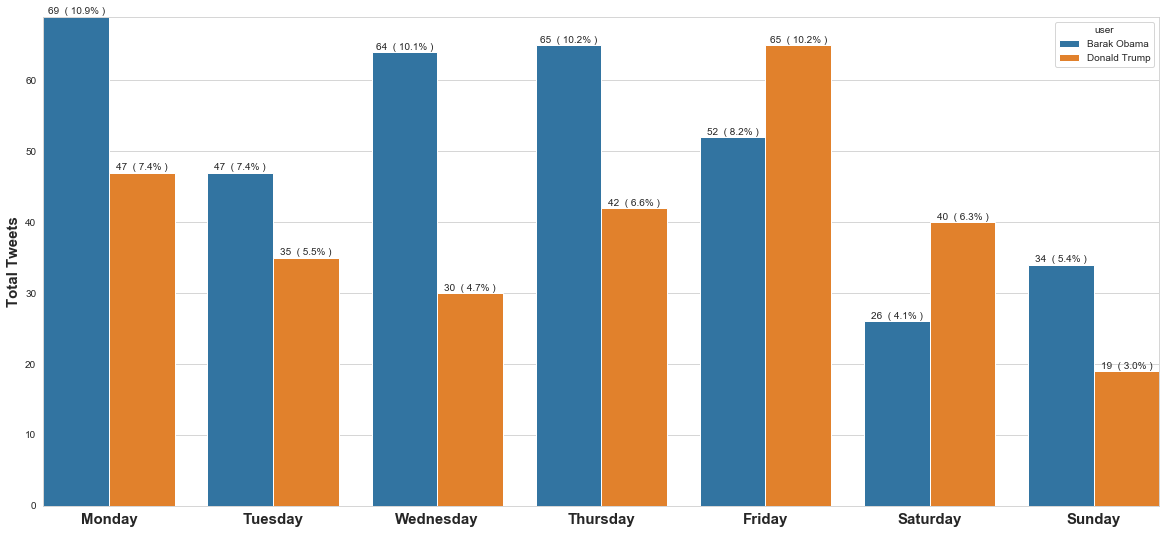

In [26]:
temp = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.set_style('whitegrid')

plt.figure(figsize = (20,9))

_ = sns.barplot(data = grouped, x = 'week_day_name', y = 'counts', hue = 'user', order = temp)
annotate_perct(ax_plot = _, add_height = 0.7, total = grouped.counts.sum(), rot= 0)

_.set_title('', pad = 40, weight= 'bold', size = 15)
_.set_xlabel('', weight= 'bold')
_.set_xticklabels(temp, rotation = 0,  weight= 'bold', fontsize = 15)
_.set_ylabel('Total Tweets', fontsize = 15, weight= 'bold')
_.margins(0)

plt.show()

### Detailed Comparison 

# **THESE ARE NOT PIE CHARTS!! THESE ARE DONUT CHARTS AND I LOVE THEM AND THEY DO MAKE SENSE TO KEEP THEM. ALSO THIS IS MY FINAL PROJECT :)**

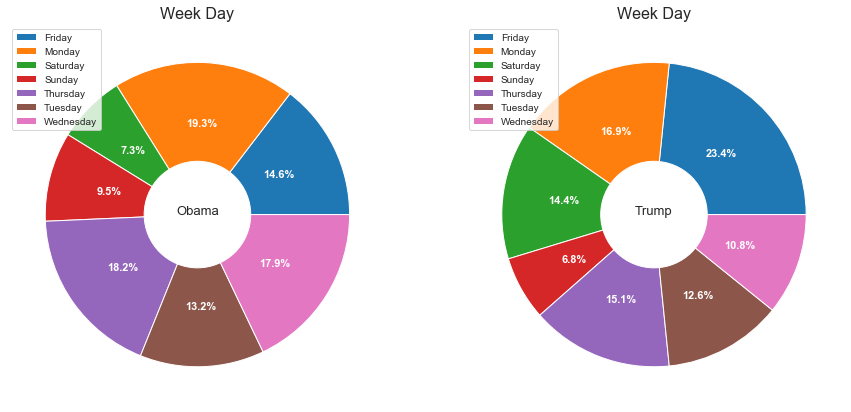

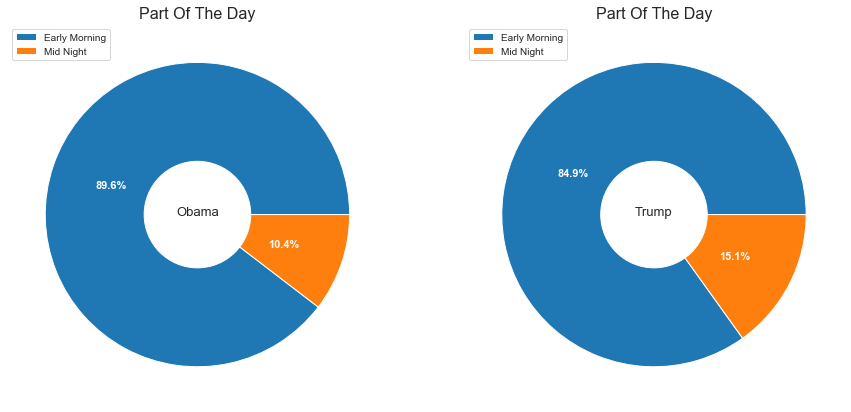

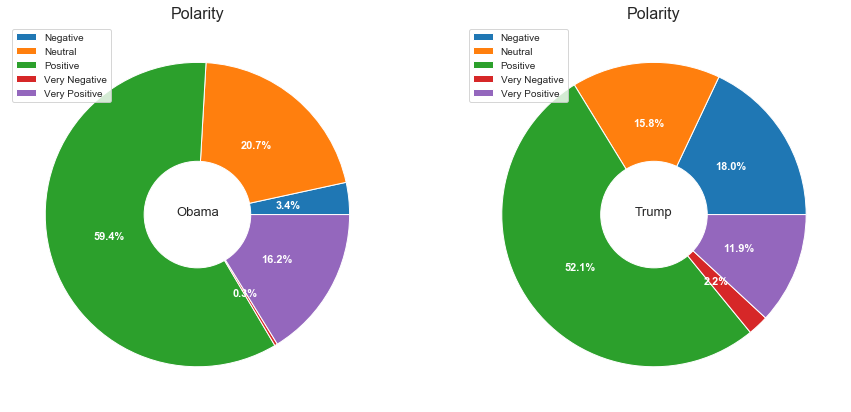

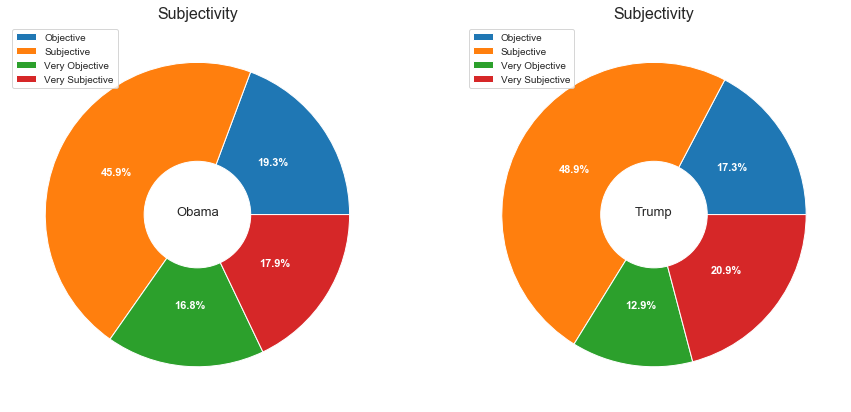

In [27]:
# Define donut_plot function
def donut_plot(data_1, data_2, target, plot_title):

    fig, ax = plt.subplots(ncols = 2, figsize= (15,7))
    
    # Data preproccessing
    x = pd.DataFrame((data_1[target].value_counts(normalize=True).sort_index() * 100).round(1).reset_index().rename(columns = {'index': 'variable', 'gender': 'churn_yes'}))
    x['trump'] = (data_2[target].value_counts(normalize=True).sort_index() * 100).round(1).values

    cols_list = x.columns[1:3]
    hue_list = x.variable.unique()

    profile_list = ['Obama', 'Trump']

    for indx in range(0,2):
        # Technically its pie chart :) but I'm drawing a white circle to make them donuts!
        ax[indx].pie(data = x, x = cols_list[indx], autopct='%1.1f%%', textprops = {'fontsize': 11, 'color': 'w', 'weight': 'bold'}) 
        ax[indx].add_patch(plt.Circle((0,0), 0.35, fc = 'white'))
        label = ax[indx].annotate('{}'.format(profile_list[indx]), xy = (0, 0), fontsize = 13, ha = "center")  # weight = 'bold'
        ax[indx].legend(hue_list, loc = 2)
        ax[indx].set_title(plot_title, size = 16)
    plt.show()

# Seperate dataframe into obama and trump's dataframes
obama_df = df[df.user == 'Barak Obama']
trump_df = df[df.user == 'Donald Trump']

# Call donut plot function for each column
for indx, col in round1_cols_dict.items():
    if indx != 0: # Avoid Twitter profile comparison
        donut_plot( data_1 = obama_df, 
                    data_2 = trump_df, 
                    target = round1_cols_dict[indx], 
                    plot_title = '{}'.format(round1_titles[indx].title()) ) # .title() to capitilize the first character

# General Observations:
1. Obama prefers to tweet begining of each week unlike Trump as he prefers to tweet end of each week.
2. Trump's tweets contain negativity much more than Obama's
3. Trump's tweets reflects mostly his personal opinion unlike Obama as his tweets are fact-based and also personal opinion.
    

### Summary

In [28]:
# Aggregate dataframe 
summarized_df = df.groupby(['user']).agg({ 'favorite_counts': 'sum',       # Tweets overview
                                           'retweet_counts': 'sum',
                                           'is_positive': 'sum',
                                           'is_negative': 'sum',
                                          
                                           'tweets_length': 'sum',         # Tweets writing style
                                           'tweets_uppercase': 'sum',
                                           'tweets_punctuations': 'sum',
                                           'tweets_questionmark': 'sum',
                                           
                                           'is_norp': 'sum',               # Tweets detailed writing style
                                           'is_time': 'sum',
                                           'is_org': 'sum',
                                           'is_gpe': 'sum',
                                           'is_loc': 'sum',
                                           'is_product': 'sum',
                                           'is_workart': 'sum',
                                           'is_fac': 'sum',
                                           'is_noun': 'sum',
                                           'is_pron': 'sum',
                                           'is_adv': 'sum',
                                           'is_propn': 'sum',
                                           'is_verb': 'sum',
                                           'is_intj': 'sum'  }).reset_index()

# Seperate dataframe 
obama_summarized_df = summarized_df[summarized_df.user == 'Barak Obama'].drop('user', axis = 1).copy()
trump_summarized_df = summarized_df[summarized_df.user == 'Donald Trump'].drop('user', axis = 1).copy()

# Get columns
summarized_cols      = obama_summarized_df.columns

# Create features for each round in list format
round_1_cols = summarized_cols[:5]
round_2_cols = summarized_cols[5:10]
round_3_cols = summarized_cols[10:15]
round_4_cols = summarized_cols[15:20]
round_5_cols = summarized_cols[20:22]

# Combine all lists into one list
temp_list = [round_1_cols, round_2_cols, round_3_cols, round_4_cols, round_5_cols]

# Dictionary to rename the titles
rep_title_dict = {  'favorite_counts': 'Tweets Likes',
                    'retweet_counts': 'Re-Tweets',
                    'is_positive': 'Positivity',
                    'is_negative': 'Negativity',
                    'tweets_length': 'Length of Tweets',
                    'tweets_uppercase': 'Uppercase Characters Used',
                    'tweets_punctuations': 'Punctuations Used',
                    'tweets_questionmark': 'Questionmark Used',
                    'is_norp': 'Nationalities | Religious | Political Groups',
                    'is_time': 'Mentioned Time Related',
                    'is_org': 'Corporate | Governmental',
                    'is_gpe': 'Countries | Cities | States',
                    'is_loc': 'Location Mentioned',
                    'is_product': 'Objects | Vehicles | Foods',
                    'is_workart': 'Books | Songs',
                    'is_fac': 'Buildings | Airports | Highways',
                    'is_noun': 'Noun Used',
                    'is_pron': 'Pronoun Used',
                    'is_adv': 'Adverb Used',
                    'is_propn': 'Propn (like Apple, UK, US)',
                    'is_verb': 'Verb Used',
                    'is_intj': 'Bravo | Hello | Ouch' }

/Users/haithamalabadla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


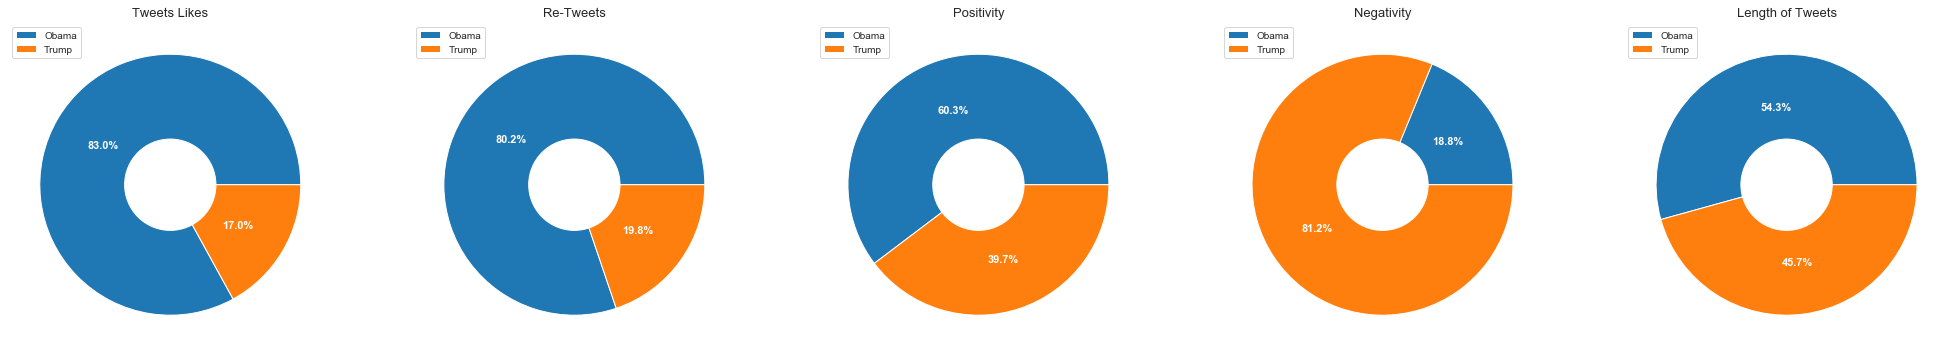

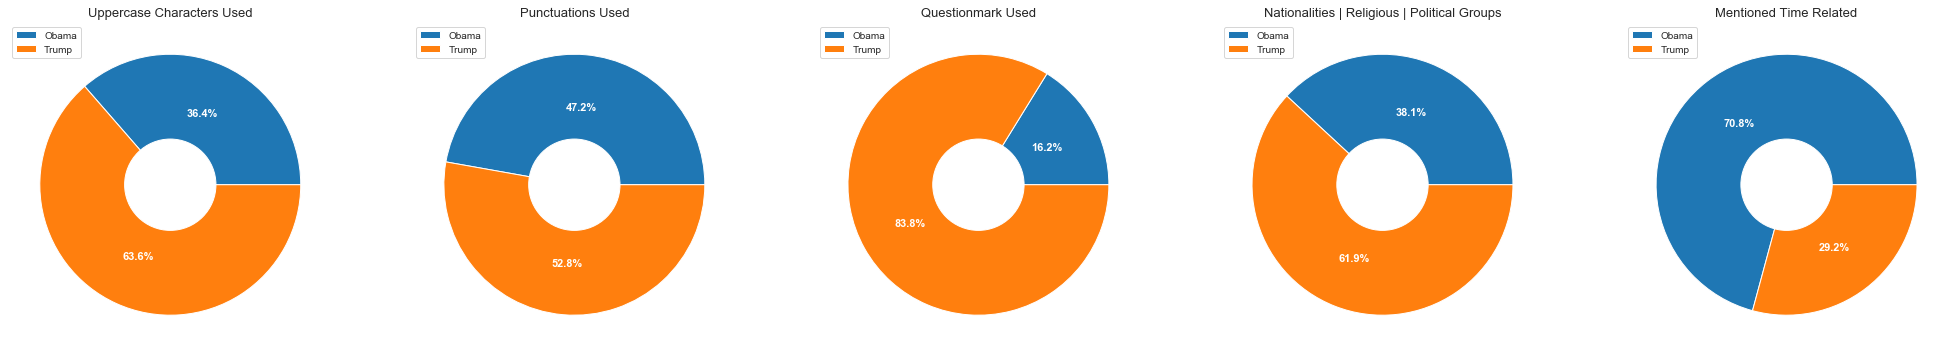

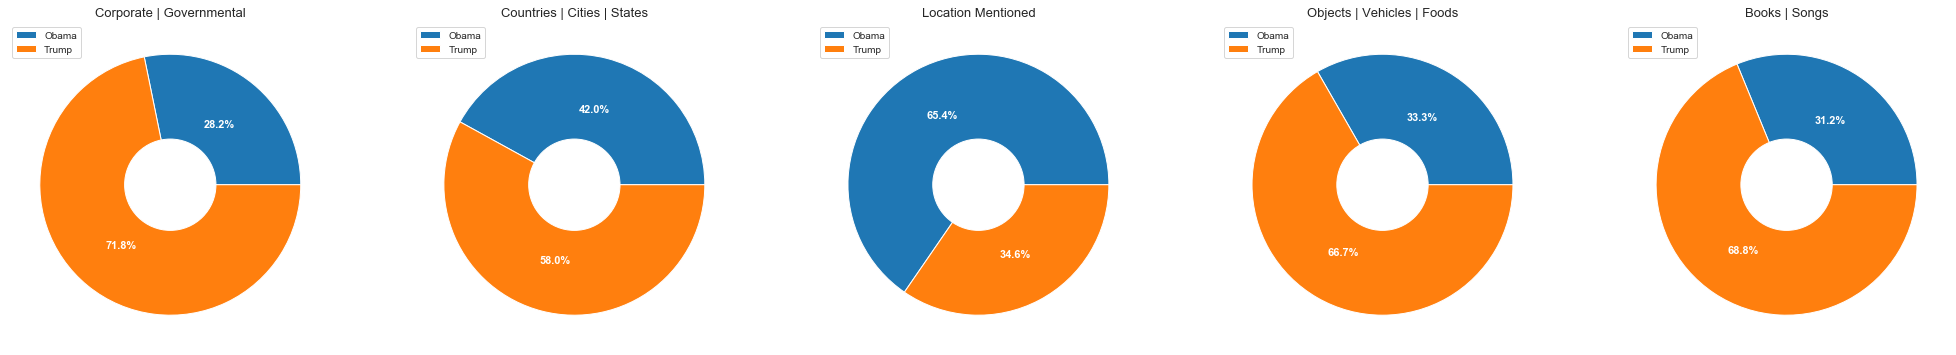

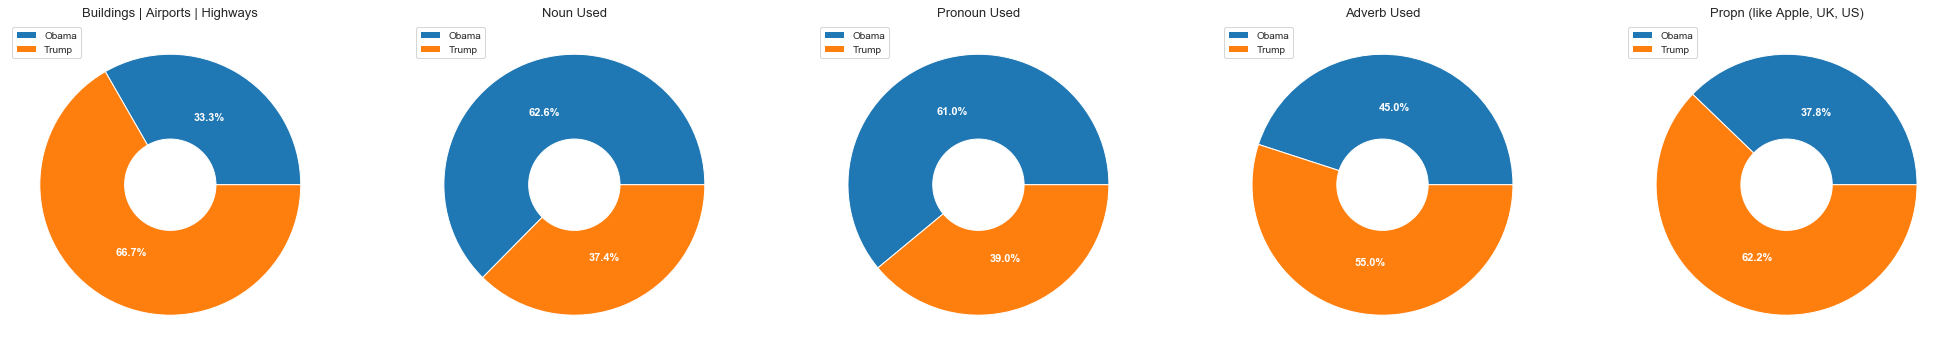

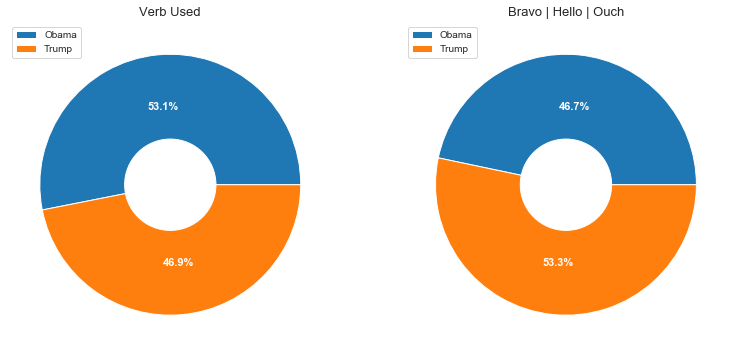

In [29]:
# Create function to plot summarized details
def summarized_donut_plot(data_1, data_2, indx_list):#, plot_title):
    
    if indx_list == 4: 
        fig, ax = plt.subplots(ncols = 2, figsize= (13,6))
    else:
        fig, ax = plt.subplots(ncols = 5, figsize= (35,6))
        
    for indx, target in enumerate(temp_list[indx_list]):

        total = df[target].sum()
    
        # Data preproccessing
        x  = round(float(data_1[target] / total * 100), 1)
        y  = round(float(data_2[target] / total * 100), 1)

        #print(total, x, y)
        
        user_list = ['Obama', 'Trump']
        results_list = [x, y]

        x = pd.DataFrame(data = results_list, index = user_list)

        ax[indx].pie(x, autopct='%1.1f%%', textprops = {'fontsize': 11, 'color': 'w', 'weight': 'bold'})
        ax[indx].add_patch(plt.Circle((0,0), 0.35, fc = 'white'))

        ax[indx].legend(user_list, loc = 2)
        ax[indx].set_title(rep_title_dict[target], size = 13)

    plt.show()

# Call pie plot function for each column
for indx, sublist in enumerate(temp_list):
    summarized_donut_plot( data_1 = obama_summarized_df, 
                           data_2 = trump_summarized_df, 
                           indx_list = indx ) 

# General Observations:
1. Obama's tweets have the most number of likes and retweets surpassing Trump by 80%
2. Obama and Trump's general positivity score are almost the same but interms of negativity, Trumps dominate the negativity.
3. Trumps surpass Obama in the length of his tweets and in using uppercase characters, punctuations and questionmarks which reflects Trump's frustration and that explains the negativity score.
4. Trump's also likes to use or name nationalities, corporates, countries, religious, political groups, airports and products in his tweets
5. However, it seems Obama cares more about food and vehicles
6. On the other hand, time and dates are important to Obama and that importance reflects in his tweets  
7. Surprisingly, it shows that Trump usually mention book's titles and songs in his tweets (you can do additional step of analysis to see whether it's used in a negative way or positive way)

# Quick way to convert summarized_df dataframe numbers to percentages 

In [30]:
# Way to convert the entire dataframe into percentages for better comparisons
summarized_perc_df = summarized_df.copy()

for col in summarized_perc_df.drop('user', axis = 1).columns.tolist():
    total = summarized_perc_df[col].sum()
    # Data preproccessing
    summarized_perc_df.loc[summarized_perc_df.user == 'Barak Obama', col]  = round(float(summarized_perc_df.loc[summarized_perc_df.user == 'Barak Obama', col] / total * 100), 1)
    summarized_perc_df.loc[summarized_perc_df.user == 'Donald Trump', col]  = round(float(summarized_perc_df.loc[summarized_perc_df.user == 'Donald Trump', col] / total * 100), 1)

# Check new dataframe
summarized_perc_df   

,user,favorite_counts,retweet_counts,is_positive,is_negative,tweets_length,tweets_uppercase,tweets_punctuations,tweets_questionmark,is_norp,is_time,is_org,is_gpe,is_loc,is_product,is_workart,is_fac,is_noun,is_pron,is_adv,is_propn,is_verb,is_intj
0,Barak Obama,83.0,80.2,60.3,18.8,54.3,36.4,47.2,16.2,38.1,70.8,28.2,42.0,65.4,33.3,31.2,33.3,62.6,61.0,45.0,37.8,53.1,46.7
1,Donald Trump,17.0,19.8,39.7,81.2,45.7,63.6,52.8,83.8,61.9,29.2,71.8,58.0,34.6,66.7,68.8,66.7,37.4,39.0,55.0,62.2,46.9,53.3


In [46]:
# Second round of cleaning before we use spaCy
unwanted_text_list = ['“','”', 'lol', 'lmao', 'tell', 'twitter', 'list', 'whatever', 'lmfaooooooooooooooooo', 'cuz', 'ass', 'fuck', 'lmfaoo', 'wtf', 
                      'sis', 'bro', 'jajajaajajajaja', 'jajaja', 'jaja', 'haha', 'shit', 'bro', 'sis', 'dad', 'mum', 'mam', 'yaa', 'yes', 
                      'lmfao', 'like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people', 'youre', 'got', 'gonna', 'time', 'think', 
                      'yeah', 'said', 'amp', 'omg', 'lmaoo', 'don', 'bio', 'lmaoooo', 'say', 'like', 'don', 'lmfaoooo', 'lmaooo', 'boy', 
                      'lot', 'doeee', 'sir', 'nt', 'girl', 'say', 'way', 'new', 'office', 'go', 'see', 'need']

# Convert text into lowercase, remove tokens if they are in the unwated list or if they are a digit or a puncuation
def SecondRound_cleaning_tweets(x):
    tweet = ''.join([char.lower() for char in x if char not in unwanted_text_list and char.isdigit() == False and char not in string.punctuation])
    return tweet

# Store clean tweets
df['clean_tweets_SecondRound'] = df.tweets.apply(lambda x: SecondRound_cleaning_tweets(x))

In [47]:
# Check
df.loc[:, ['tweets', 'clean_tweets_SecondRound']][:5]

,tweets,clean_tweets_SecondRound
0,OUR GREAT COUNTRY MUST HAVE BORDER SECURITY!,our great country must have border security
1,Wishing Supreme Court Justice Ruth Bader Ginsburg a full and speedy recovery!,wishing supreme court justice ruth bader ginsburg a full and speedy recovery
2,Some of the many Bills that I am signing in the Oval Office right now. Cancelled my trip on Air Force One to Florida while we wait to see if the D...,some of the many bills that i am signing in the oval office right now cancelled my trip on air force one to florida while we wait to see if the de...
3,A design of our Steel Slat Barrier which is totally effective while at the same time beautiful!,a design of our steel slat barrier which is totally effective while at the same time beautiful
4,"Today, it was my honor to sign into law H.R. 7213, the “Countering Weapons of Mass Destruction Act of 2018.” The Act redesignates the @DHSgov Dome...",today it was my honor to sign into law hr the countering weapons of mass destruction act of the act redesignates the dhsgov domestic nuclear det...


# Cleaning Tweets Using spaCy

In [63]:
# Function to clean tweets using spacy from punctuations, stopwords and lemmatize them
def cleaning_tweets(x):
    # Spacy pipeline
    tweet = nlp(x)
    # Extract lemmatized words in lower case format if not digits, not punctuation, not stopword, and lenght not less than 2 
    tweet = ' '.join([token.lemma_.lower() for token in tweet if not token.is_stop and not token.is_punct and not token.text.isdigit() and len(token.text) > 2])
    tweet = ' '.join([token for token in tweet.split() if token not in unwanted_text_list])
    return tweet

# Store clean tweets
df['clean_tweets'] = df.clean_tweets_SecondRound.apply(lambda x: cleaning_tweets(x))

In [64]:
# Check
df.loc[:, ['tweets', 'clean_tweets_SecondRound', 'clean_tweets']][:5]

,tweets,clean_tweets_SecondRound,clean_tweets
0,OUR GREAT COUNTRY MUST HAVE BORDER SECURITY!,our great country must have border security,great country border security
1,Wishing Supreme Court Justice Ruth Bader Ginsburg a full and speedy recovery!,wishing supreme court justice ruth bader ginsburg a full and speedy recovery,wish supreme court justice ruth bad ginsburg speedy recovery
2,Some of the many Bills that I am signing in the Oval Office right now. Cancelled my trip on Air Force One to Florida while we wait to see if the D...,some of the many bills that i am signing in the oval office right now cancelled my trip on air force one to florida while we wait to see if the de...,bill sign oval cancel trip air force florida wait democrat help protect america southern border
3,A design of our Steel Slat Barrier which is totally effective while at the same time beautiful!,a design of our steel slat barrier which is totally effective while at the same time beautiful,design steel slat barrier totally effective beautiful
4,"Today, it was my honor to sign into law H.R. 7213, the “Countering Weapons of Mass Destruction Act of 2018.” The Act redesignates the @DHSgov Dome...",today it was my honor to sign into law hr the countering weapons of mass destruction act of the act redesignates the dhsgov domestic nuclear det...,today honor sign law counter weapon mass destruction act act redesignate dhsgov domestic nuclear detection counter weapon mass destruction read


To add/ remove word(s) from/ to spaCy stopwords:
- nlp.Defaults.stop_words.add("my_new_stopword")
- nlp.Defaults.stop_words |= {"my_new_stopword1","my_new_stopword2",}
- nlp.Defaults.stop_words.remove("whatever")
- nlp.Defaults.stop_words -= {"whatever", "whenever"}

# Words Count

In [65]:
# Initiate lists
obama_words_list = []
trump_words_list  = []

# Function to append word by word to their specific list
def collect_words(x, user_list):
    words = nlp(x.lower())
    [user_list.append(token.text) for token in words if not token.is_stop and not token.is_punct and not token.is_space]

# Send tweets to the function
_ = df.loc[df.user == 'Barak Obama', 'clean_tweets'].apply(lambda x: collect_words(x, obama_words_list))
_ = df.loc[df.user == 'Donald Trump', 'clean_tweets'].apply(lambda x: collect_words(x, trump_words_list))

# Apply counter function to count words
obama_freq_words = Counter(obama_words_list)
trump_freq_words = Counter(trump_words_list)

# Store the top 100 words
obama_top100_words = obama_freq_words.most_common(100)
trump_top100_words = trump_freq_words.most_common(100)

In [66]:
# Print top 5 words from each list
print(obama_top100_words[:5])
print(trump_top100_words[:5])

[('today', 56), ('world', 54), ('vote', 48), ('help', 46), ('day', 44)]
[('great', 70), ('democrat', 47), ('country', 44), ('president', 42), ('border', 41)]


# Display Common Words Using WordCloud

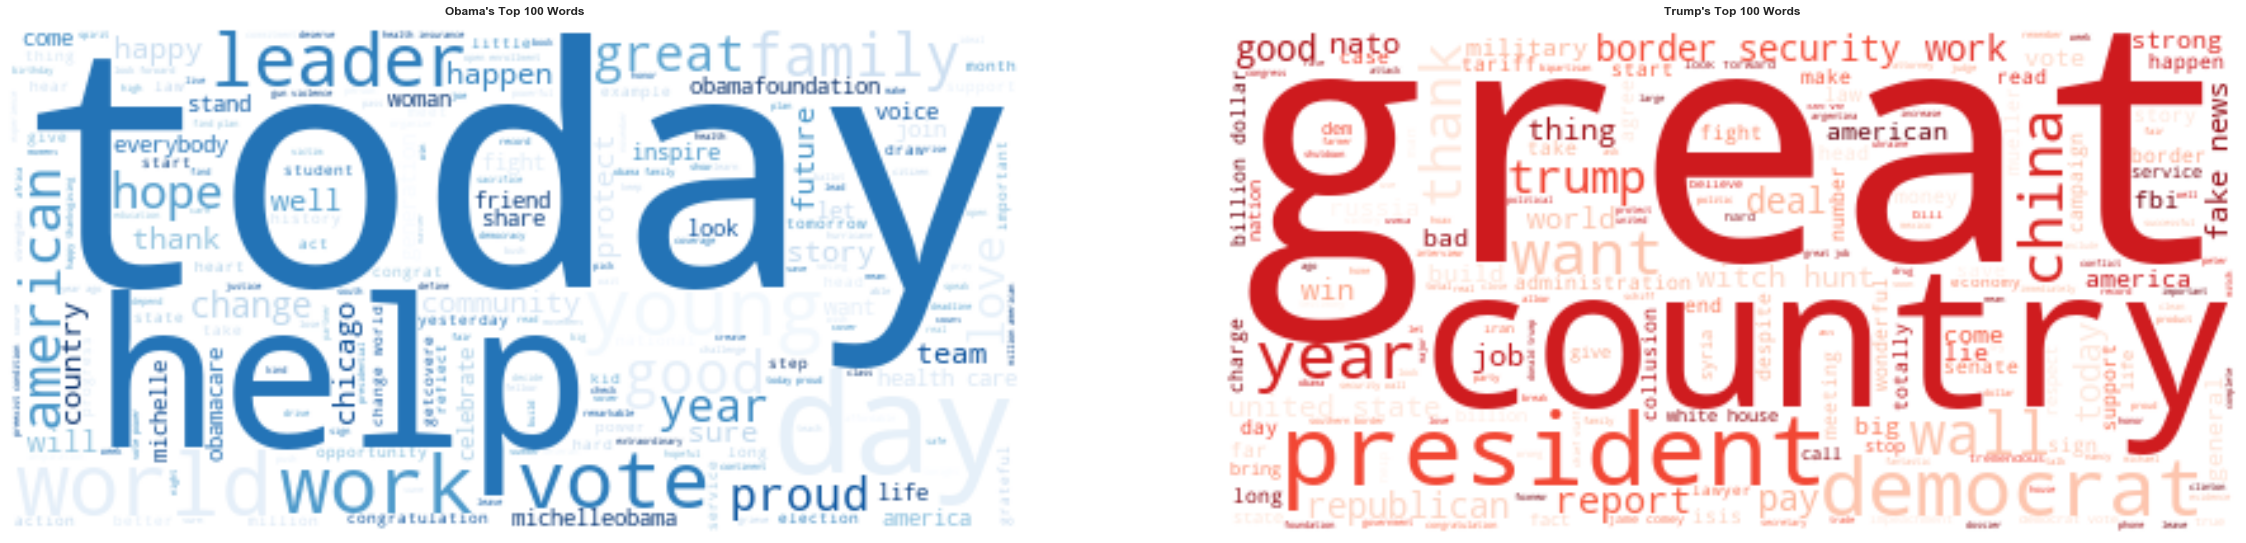

In [81]:
# Combine all tweets into one for each user
obama_full_words = ' '.join([sent for sent in df.loc[df.user == 'Barak Obama', 'clean_tweets']])
trump_full_words = ' '.join([sent for sent in df.loc[df.user == 'Donald Trump', 'clean_tweets']])

# Initiate the WorldCloud
wc_obama = WordCloud(background_color="white", colormap="Blues", max_font_size=200, random_state=42) # blue color
wc_trump = WordCloud(background_color="white", colormap="Reds", max_font_size=200, random_state=42) # red color

# Function to display most common words
def plot_wordcloud(lists, titles, wc):
    
    fig, ax = plt.subplots(ncols = 2, figsize= (40,12))
    
    for indx, sents in enumerate(lists):
        wc[indx].generate(sents)
        ax[indx].imshow(wc[indx], interpolation = 'bilinear')
        ax[indx].axis('off')
        ax[indx].set_title(titles[indx], pad = 14, weight = 'bold')
    plt.show()

# Send user's tweets to the function
plot_wordcloud( lists  = [obama_full_words, trump_full_words],
                titles = ["Obama's Top 100 Words" , "Trump's Top 100 Words"],
                wc     = [wc_obama, wc_trump] )

### Display word in worldCloud with mask image

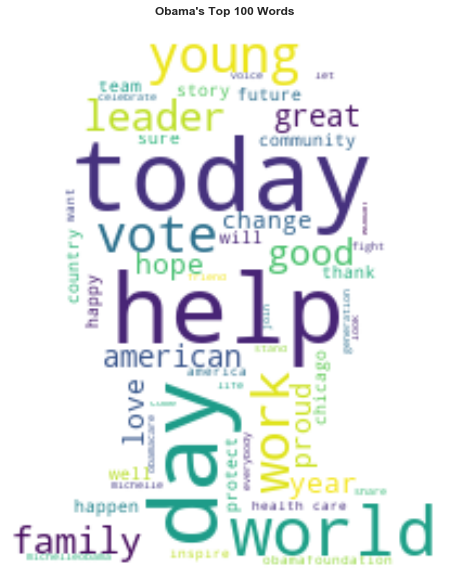

In [82]:
# Import the image to have it as mask
obama_mask = np.array(Image.open("obama_face.jpeg"))

# Initiate the wordcloud with the mask parameter
wc_msk = WordCloud(background_color="white", mask = obama_mask)
wc_msk.generate(obama_full_words)

plt.figure(figsize= (35,10))

plt.imshow(wc_msk, interpolation = 'bilinear')
plt.axis('off')
plt.title("Obama's Top 100 Words", pad = 14, weight = 'bold')

plt.show()

# Drop Unwanted Columns

In [83]:
# Drop unwanted columns and convert user profile into numeric reps
df['profile'] = df.user.replace({'Donald Trump': 0, 'Barak Obama': 1})
df.drop(['id', 'user', 'tweets', 'clean_tweets_SecondRound'], axis = 1, inplace = True)

# Export DataFrame
1. Export DataFrame as pickle file to use in Part 4

In [84]:
# Export dataframe object as pickle
df.to_pickle('Jan19_Trump_Obama_Tweets_ML_Ready_Final.pickle')